In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"E:\Projects Data Scientist\credit-risk-project\data\credit_data.csv")

# Target variable
TARGET = "SeriousDlqin2yrs"

In [2]:
# Split Defaulters vs Non-Defaulters
defaulters = df[df[TARGET] == 1]
non_defaulters = df[df[TARGET] == 0]

print("Total customers:", len(df))
print("Defaulters:", len(defaulters))
print("Non-defaulters:", len(non_defaulters))

print("Default rate:", round(len(defaulters) / len(df) * 100, 2), "%")

Total customers: 150000
Defaulters: 10026
Non-defaulters: 139974
Default rate: 6.68 %


In [3]:
# Default Rate by Buckets
def default_rate_by_bucket(df, feature, bins):
    temp = df[[feature, TARGET]].copy()
    temp["bucket"] = pd.cut(temp[feature], bins=bins)
    
    summary = temp.groupby("bucket")[TARGET].agg(
        default_rate="mean",
        count="count"
    ).reset_index()
    
    summary["default_rate"] = summary["default_rate"] * 100
    return summary

In [4]:
# Risk Analysis: Credit Utilization
util_bins = [-np.inf, 0.1, 0.3, 0.5, 0.8, 1.0, np.inf]

util_summary = default_rate_by_bucket(
    df,
    "RevolvingUtilizationOfUnsecuredLines",
    util_bins
)

util_summary

C:\Users\DELL\AppData\Local\Temp\ipykernel_20740\2746036757.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = temp.groupby("bucket")[TARGET].agg(


,bucket,default_rate,count
0,"(-inf, 0.1]",1.810447,64404
1,"(0.1, 0.3]",3.142777,28478
2,"(0.3, 0.5]",5.849653,15830
3,"(0.5, 0.8]",10.776849,16155
4,"(0.8, 1.0]",18.618192,21812
5,"(1.0, inf]",37.247817,3321


In [5]:
# Risk Analysis: 90+ Days Delinquency
delinq_90_bins = [-1, 0, 1, 2, 5, np.inf]

delinq_90_summary = default_rate_by_bucket(
    df,
    "NumberOfTimes90DaysLate",
    delinq_90_bins
)

delinq_90_summary

C:\Users\DELL\AppData\Local\Temp\ipykernel_20740\2746036757.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = temp.groupby("bucket")[TARGET].agg(


,bucket,default_rate,count
0,"(-1.0, 0.0]",4.626505,141662
1,"(0.0, 1.0]",33.663933,5243
2,"(1.0, 2.0]",49.903537,1555
3,"(2.0, 5.0]",60.881543,1089
4,"(5.0, inf]",59.423503,451


In [6]:
# Risk Analysis: 30–59 Days Delinquency
delinq_30_bins = [-1, 0, 1, 2, 5, np.inf]

delinq_30_summary = default_rate_by_bucket(
    df,
    "NumberOfTime30-59DaysPastDueNotWorse",
    delinq_30_bins
)

delinq_30_summary

C:\Users\DELL\AppData\Local\Temp\ipykernel_20740\2746036757.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = temp.groupby("bucket")[TARGET].agg(


,bucket,default_rate,count
0,"(-1.0, 0.0]",4.000222,126018
1,"(0.0, 1.0]",15.025260,16033
2,"(1.0, 2.0]",26.511527,4598
3,"(2.0, 5.0]",38.339782,2843
4,"(5.0, inf]",52.559055,508


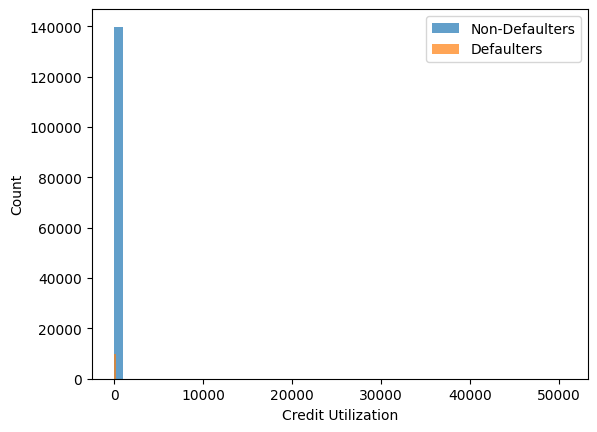

In [7]:
# Simple Distribution Comparison
plt.figure()
plt.hist(non_defaulters["RevolvingUtilizationOfUnsecuredLines"], bins=50, alpha=0.7, label="Non-Defaulters")
plt.hist(defaulters["RevolvingUtilizationOfUnsecuredLines"], bins=50, alpha=0.7, label="Defaulters")
plt.xlabel("Credit Utilization")
plt.ylabel("Count")
plt.legend()
plt.show()

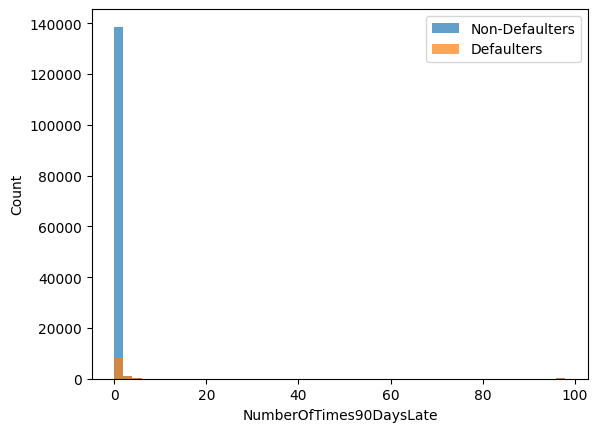

In [8]:
plt.figure()
plt.hist(non_defaulters["NumberOfTimes90DaysLate"], bins=50, alpha=0.7, label="Non-Defaulters")
plt.hist(defaulters["NumberOfTimes90DaysLate"], bins=50, alpha=0.7, label="Defaulters")
plt.xlabel("NumberOfTimes90DaysLate")
plt.ylabel("Count")
plt.legend()
plt.show()

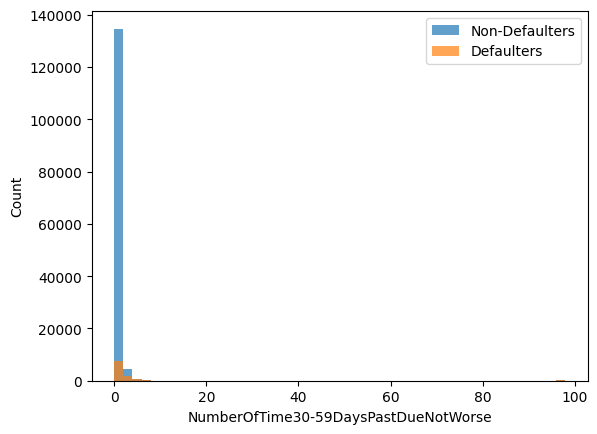

In [9]:
plt.figure()
plt.hist(non_defaulters["NumberOfTime30-59DaysPastDueNotWorse"], bins=50, alpha=0.7, label="Non-Defaulters")
plt.hist(defaulters["NumberOfTime30-59DaysPastDueNotWorse"], bins=50, alpha=0.7, label="Defaulters")
plt.xlabel("NumberOfTime30-59DaysPastDueNotWorse")
plt.ylabel("Count")
plt.legend()
plt.show()

In [10]:
# Identify Red Flags (Data Quality Observations)
# Extreme utilization values
(df["RevolvingUtilizationOfUnsecuredLines"] > 1).sum()

np.int64(3321)

In [11]:
# Missing income
df["MonthlyIncome"].isna().mean() * 100

np.float64(19.820666666666668)